In [158]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [159]:
import seaborn as sns
sns.set(color_codes=True)

In [160]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [161]:
h = pd.read_csv('D1216mdif2plus.csv',index_col=0)
h['Sector']=h['Sector'].astype(int)
h['EmpLevel']=h['EmpLevel'].astype(int)
h['firmas12']=h['firmas12'].astype(int)
h['firmas16']=h['firmas16'].astype(int)

#h.columns = ['ent','mun','Sector','EmpLevel','firmas12','firmas16','diffirmas']
h.head()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,ptot10cum,dptot,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum
0,1001.0,1,1,5,17,12.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
1,1001.0,1,2,4,0,-4.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
2,1001.0,1,3,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
3,1001.0,1,4,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215
4,1001.0,1,5,0,0,0.0,797010.0,-1.768,877190.0,-1.676,90924681.0,0.02012,75.3,23.5,94.1,4.6,0.9,98265215


In [162]:
h['Sector']=h['Sector'].astype(int)
h['EmpLevel']=h['EmpLevel'].astype(int)
h['ptot15cum']=h['ptot15cum']/1.194916e+08
h['ptot10cum']=h['ptot10cum']/1.123365e+08
h.describe()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,ptot10cum,dptot,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum
count,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,1.546650e+05,154665.000000,1.546650e+05,154665.000000,1.546650e+05,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,154665.000000,1.546650e+05
mean,19365.572301,5.000000,4.000000,28.381780,31.772276,3.390496,4.565865e+04,0.000413,4.858149e+04,0.000360,1.207250e-01,0.007020,90.399308,8.134379,95.724725,2.255275,1.283747,1.193638e-01
std,7361.375256,2.581997,2.000006,373.722504,401.295685,47.994908,1.327420e+05,0.999785,1.390434e+05,0.999943,1.615499e-01,0.021716,9.679783,9.167626,2.570824,2.370886,1.991641,1.622559e-01
min,1001.000000,1.000000,1.000000,0.000000,0.000000,-2889.000000,9.300000e+01,-2.342000,8.700000e+01,-2.228000,8.278698e-07,-0.084055,29.200000,-6.000000,60.200000,-6.000000,-6.000000,7.280847e-07
25%,14083.000000,3.000000,2.000000,0.000000,0.000000,0.000000,4.263000e+03,-0.760000,4.245000e+03,-0.748000,1.159386e-02,-0.001303,87.900000,2.500000,94.600000,1.000000,0.400000,1.066226e-02
50%,20230.000000,5.000000,4.000000,0.000000,0.000000,0.000000,1.271300e+04,-0.029000,1.329000e+04,-0.073000,5.503330e-02,0.008017,93.400000,5.200000,96.000000,1.800000,1.100000,5.305372e-02
75%,24031.000000,7.000000,6.000000,2.000000,2.000000,0.000000,3.267700e+04,0.679000,3.435300e+04,0.643000,1.672426e-01,0.015290,96.500000,10.400000,97.300000,2.900000,2.300000,1.640772e-01
max,32058.000000,9.000000,7.000000,40111.000000,41037.000000,5138.000000,1.815786e+06,4.363000,1.827868e+06,5.027000,1.000000e+00,0.636425,100.000000,65.200000,100.000000,38.800000,11.400000,1.000000e+00


In [163]:
h.head()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,ptot10cum,dptot,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum
0,1001.0,1,1,5,17,12.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
1,1001.0,1,2,4,0,-4.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
2,1001.0,1,3,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
3,1001.0,1,4,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
4,1001.0,1,5,0,0,0.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361


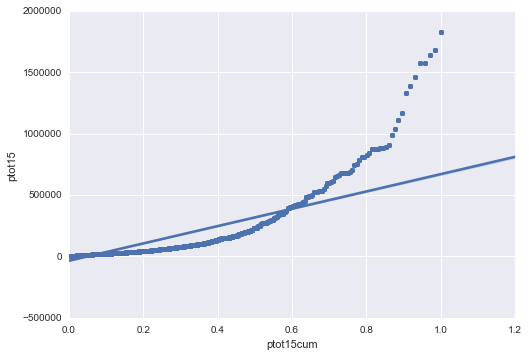

In [164]:
#plt.scatter([h.nacent10, h.ptot10])
sns.regplot(x=h.ptot15cum, y=h.ptot15)
sns.plt.xlim(0,)
plt.show()


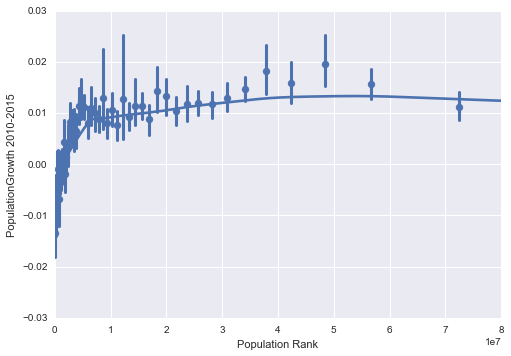

In [165]:
p= pd.read_csv('pobmuncum1015.csv',index_col=0)
p['lptot10']=p.ptot10.apply(lambda x: np.log(x))
p['lptot15']=p.ptot15.apply(lambda x: np.log(x))
p['popgrowth10_15']=(p.lptot15-p.lptot10)/5
#sns.regplot(x=p.lpop10cum, y=p.lpop15cum)
fig=sns.regplot(x=p.ptot10cum, y=p.popgrowth10_15,x_bins=50,lowess=True)
#fig=sns.distplot(p.popgrowth10_15)
plt.xlim(0,)
fig.set_xlabel('Population Rank')
fig.set_ylabel('PopulationGrowth 2010-2015')
plt.show()
#"Population Rank", 

In [166]:
hm=h
hm.head()

,entmun,Sector,EmpLevel,firmas12,firmas16,firmasdif,ptot10,im10,ptot15,im15,ptot10cum,dptot,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,ptot15cum
0,1001.0,1,1,5,17,12.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
1,1001.0,1,2,4,0,-4.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
2,1001.0,1,3,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
3,1001.0,1,4,1,0,-1.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361
4,1001.0,1,5,0,0,0.0,797010.0,-1.768,877190.0,-1.676,0.809396,0.02012,75.3,23.5,94.1,4.6,0.9,0.822361


In [167]:
#!pip install palettable
from palettable.colorbrewer.qualitative import Accent_7
pal=Accent_7.mpl_colors
pal
#LUEGO LO CAMBIE

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]

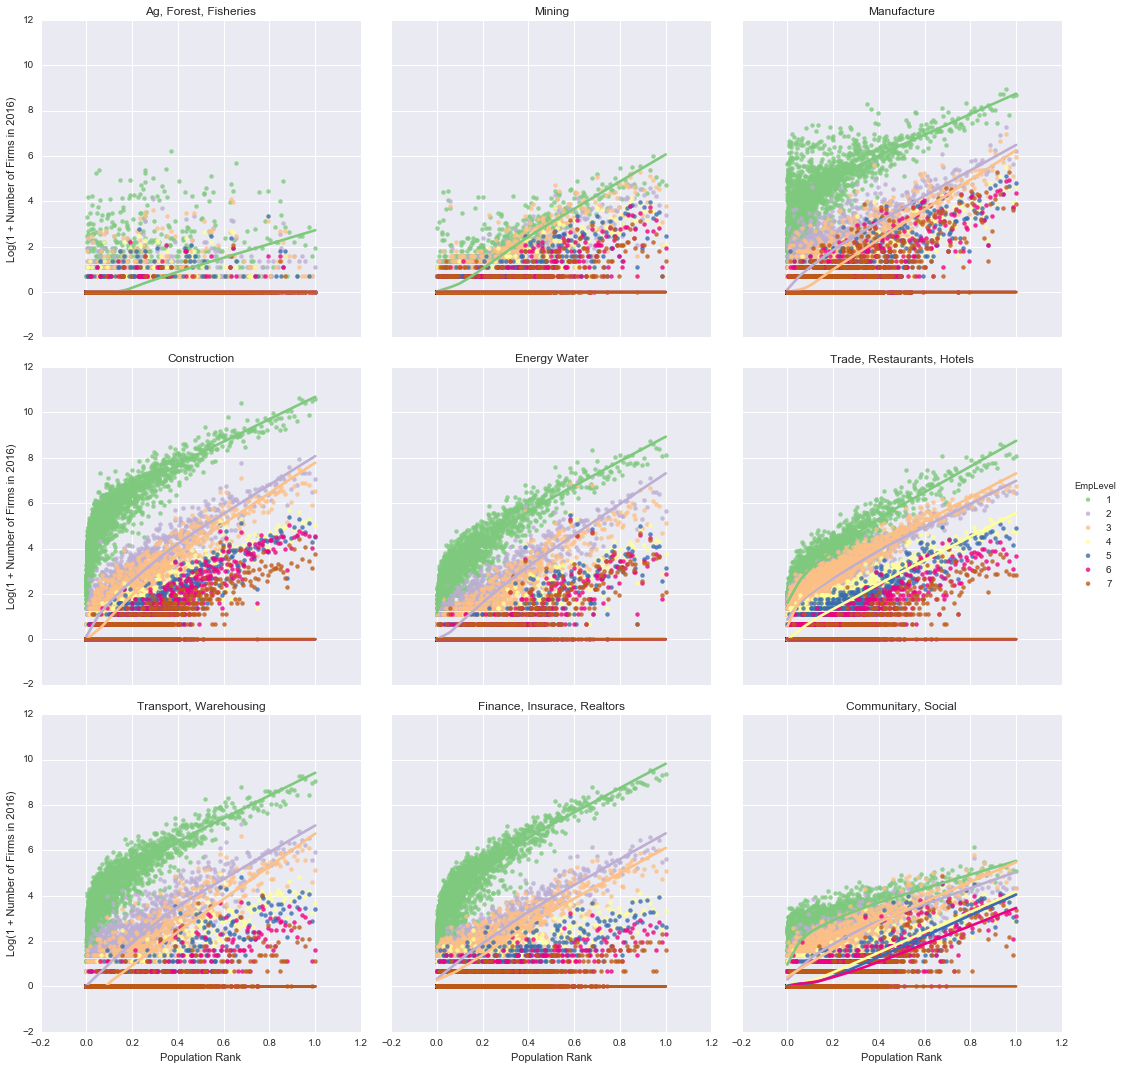

In [200]:
#Consultar Palettes en https://jiffyclub.github.io/palettable/  (Set1, Accent, etc.)
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))
#pal = dict(1='seagreen',2='y',3='m',4='c',5='r',6='g',7='b')
pal=[(0.4980392156862745, 0.788235294117647, 0.4980392156862745), (0.496732026143791,0.454901960784313,0.554248366013071), (0.661437908496732,0.501960784313725,0.350326797385621), (0.5, 0.5, 0.3), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]  

fig=sns.lmplot(x="ptot15cum", y="logfirms16", hue="EmpLevel", data=hm,palette="Accent",lowess=True,row='row',col='col')
#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Log(1 + Number of Firms in 2016)")

In [201]:
#import matplotlib.colors as col
#col.ListedColormap([ (1.0, 1.0, 0.6), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)], name='pal', N=None)
pal

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.496732026143791, 0.454901960784313, 0.554248366013071),
 (0.661437908496732, 0.501960784313725, 0.350326797385621),
 (0.5, 0.5, 0.3),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]

In [15]:
#pal2=[(1.0, 1.0, 0.6),(0.2196078431372549, 0.4235294117647059, 0.6901960784313725),(0.9411764705882353, 0.00784313725490196, 0.4980392156862745),(0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]    
#LO CAMBIE A
pal2=[ (0.5, 0.5, 0.3), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]  



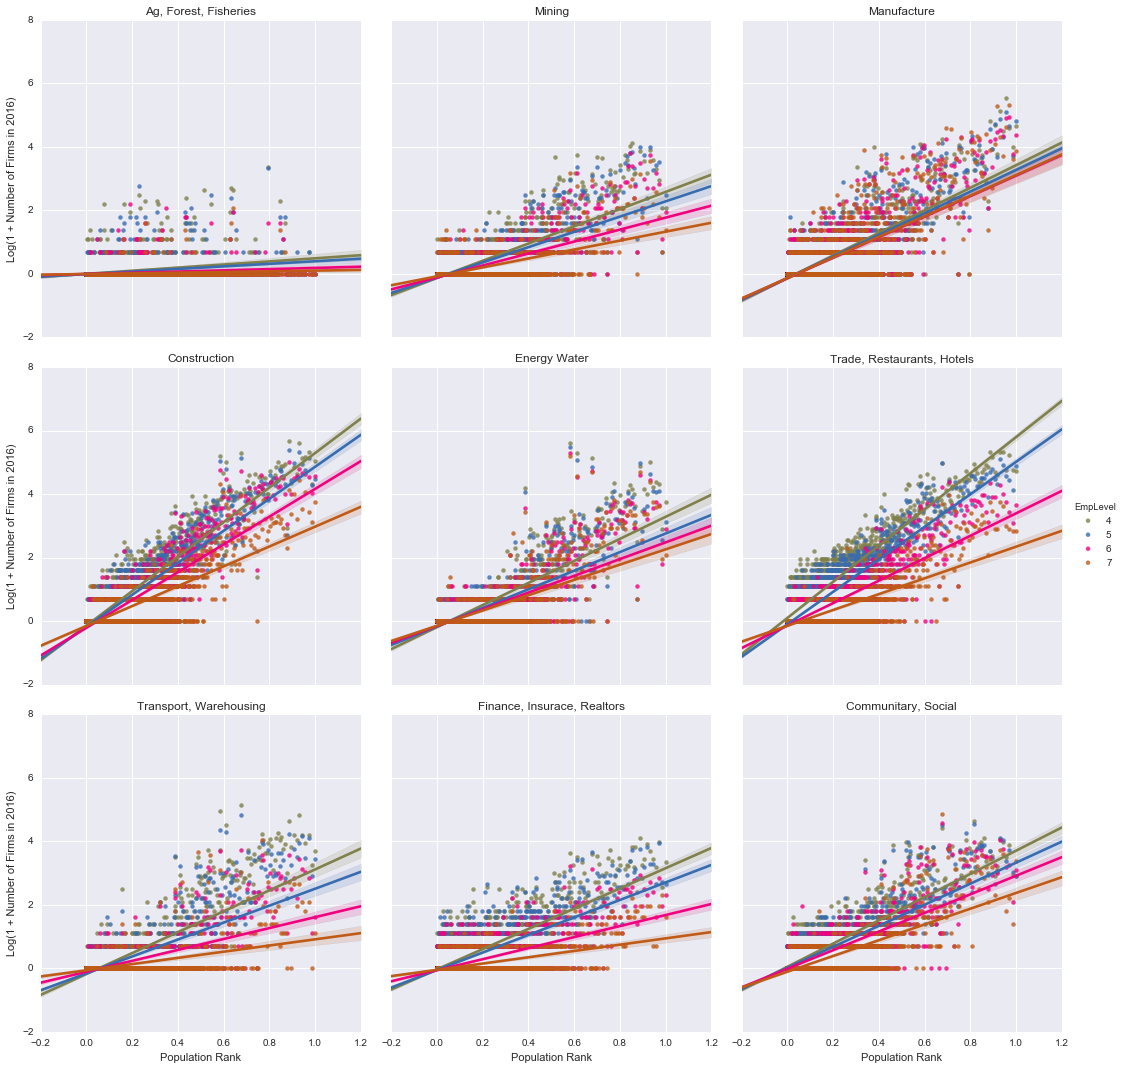

In [203]:
#pal=sns.color_palette() ; antes sirvio. El lowess aqui no funciona para la mayoria de los casos
hm=h
hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))
#pal = dict(str(1)='seagreen',str(2)='y',str(3)='m',str(4)='c',str(5)='r',str(6)='g',str(7)='b')
pal2=[ (0.5, 0.5, 0.3), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]  

#palette="Set1"
fig=sns.lmplot(x="ptot15cum", y="logfirms16", hue="EmpLevel", data=hm[hm.EmpLevel>3],row='row',col='col',palette=pal2) 
#fig.suptitle("Firms vs Population Rank, by Employment Levels, Colors reflecting Sectors", fontsize=16)

fig.facet_axis(0,0).set_title('Ag, Forest, Fisheries')
fig.facet_axis(0,1).set_title('Mining')
fig.facet_axis(0,2).set_title('Manufacture')
fig.facet_axis(1,0).set_title('Construction')
fig.facet_axis(1,1).set_title('Energy Water')
fig.facet_axis(1,2).set_title('Trade, Restaurants, Hotels')
fig.facet_axis(2,0).set_title('Transport, Warehousing')
fig.facet_axis(2,1).set_title('Finance, Insurace, Realtors')
fig.facet_axis(2,2).set_title('Communitary, Social')

fig = fig.set_axis_labels("Population Rank", "Log(1 + Number of Firms in 2016)")

In [87]:
hm=h
hm['logfirms12']=hm.firmas12.apply(lambda x: np.log(1+x))/10.599431
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))/10.622254
hm['lf12']=hm.logfirms12.apply(lambda x: 10*x//1)
hm['pc']=hm.ptot10cum.apply(lambda x: 9.99*x//1)
aa=hm[['entmun','Sector','EmpLevel','ptot10cum','ptot15cum','logfirms12','logfirms16','lf12','pc']]

#aa['row']=aa.Sector.apply(lambda x: (x-1)//3 + 1)
#aa['col']=aa.Sector.apply(lambda x: x-3*((x-1)//3))

aa.describe()


,entmun,Sector,EmpLevel,ptot10cum,ptot15cum,logfirms12,logfirms16,lf12,pc
count,154665.000000,154665.000000,154665.000000,1.546650e+05,1.546650e+05,154665.000000,154665.000000,154665.000000,154665.000000
mean,19365.572301,5.000000,4.000000,1.207250e-01,9.989308e-10,0.073726,0.076880,0.561426,0.857841
std,7361.375256,2.581997,2.000006,1.615499e-01,1.357885e-09,0.134187,0.137603,1.190307,1.527404
min,1001.000000,1.000000,1.000000,8.278698e-07,6.093187e-15,0.000000,0.000000,0.000000,0.000000
25%,14083.000000,3.000000,2.000000,1.159386e-02,8.923017e-11,0.000000,0.000000,0.000000,0.000000
50%,20230.000000,5.000000,4.000000,5.503330e-02,4.439954e-10,0.000000,0.000000,0.000000,0.000000
75%,24031.000000,7.000000,6.000000,1.672426e-01,1.373128e-09,0.103648,0.103426,1.000000,1.000000
max,32058.000000,9.000000,7.000000,1.000000e+00,8.368792e-09,1.000000,1.000000,9.000000,9.000000


In [72]:
bb=aa[(aa.Sector==3)&(aa.EmpLevel==3)]

#bb=bb[['entmun','lf12','pc','ptot10cum','ptot15cum','logfirms12','logfirms16']]
#bb=bb.pivot_table(bb, index=['lf12','pc'], values=['ptot10cum','ptot15cum','logfirms12','logfirms16'], aggfunc='mean',fill_value=0) 
bb=bb.groupby(['lf12','pc']).mean()
cc=bb[['ptot10cum','ptot15cum','logfirms12','logfirms16']]
cc['dptotcum']=(bb['ptot15cum']-bb['ptot10cum'])/5
cc['dlogfirms']=(bb['logfirms16']-bb['logfirms12'])/4
cc.drop(cc.columns[[1,3]], axis=1, inplace=True)
cc=cc.reset_index()
#cc.head()
# 0.238534	0.032143	-0.047707	0.006844
cc.head()


C:\Users\DavidMayerF\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DavidMayerF\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DavidMayerF\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,lf12,pc,ptot10cum,logfirms12,dptotcum,dlogfirms
0,0.0,0.0,0.025799,0.010418,-0.005160,0.000056
1,0.0,1.0,0.140444,0.018643,-0.028089,0.002597
2,0.0,2.0,0.238534,0.032143,-0.047707,0.006844
3,0.0,3.0,0.344860,0.041615,-0.068972,0.003196
4,0.0,4.0,0.400985,0.065395,-0.080197,0.009508


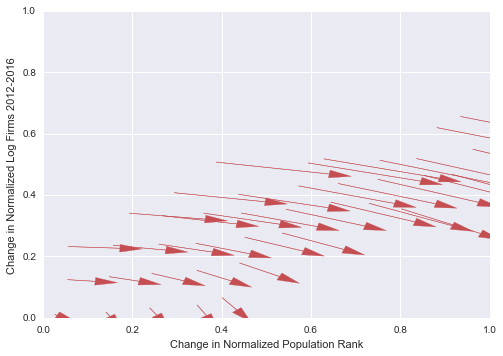

In [81]:
ax = plt.axes()

for lf in range(10) :
#    lff=lf+1
#    print(lf)
    for pc in range(10) :
#        pcc=pc+1
        aaa=cc[(cc.lf12==lf)&(cc.pc==pc)]
        if len(aaa)>0 :
            ax.arrow(aaa.iloc[0][2], aaa.iloc[0][3], 0.5*aaa.iloc[0][3], 0.5*aaa.iloc[0][4], head_width=0.025, head_length=0.05, fc='r', ec='r')
#        print(pc)

plt.ylabel('Change in Normalized Log Firms 2012-2016')
plt.xlabel('Change in Normalized Population Rank')
plt.grid(True)
#plt.ylim((-1,3))
plt.show()

In [94]:
*PARA POBLACION ACUMULADA
hm=h
hm['logfirms12']=hm.firmas12.apply(lambda x: np.log(1+x))/10.599431
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))/10.622254
hm['lf12']=hm.logfirms12.apply(lambda x: 10*x//1)
hm['pc']=hm.ptot10cum.apply(lambda x: 9.99*x//1)
hm['dptotcum']=(hm['ptot15cum']-hm['ptot10cum'])/5
hm['dlogfirms']=(hm['logfirms16']-hm['logfirms12'])/4
#hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
#hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))

bb=hm[['entmun','Sector','EmpLevel','ptot10cum','ptot15cum','logfirms12','logfirms16','lf12','pc']].groupby(['Sector','EmpLevel','lf12','pc']).mean()
bb=bb.reset_index()
cc=bb[['ptot10cum','ptot15cum','logfirms12','logfirms16','Sector','EmpLevel','lf12','pc']]
cc['dptotcum']=(bb['ptot15cum']-bb['ptot10cum'])/5
cc['dlogfirms']=(bb['logfirms16']-bb['logfirms12'])/4
cc=cc[['ptot10cum','logfirms12','dptotcum','dlogfirms','Sector','EmpLevel','lf12','pc']]
cc.head()


,ptot10cum,logfirms12,dptotcum,dlogfirms,Sector,EmpLevel,lf12,pc
0,0.026981,0.005941,-0.005396,0.000516,1,1,0.0,0.0
1,0.143766,0.012853,-0.028753,0.002065,1,1,0.0,1.0
2,0.246396,0.014480,-0.049279,0.005130,1,1,0.0,2.0
3,0.344070,0.022081,-0.068814,0.004689,1,1,0.0,3.0
4,0.445912,0.021209,-0.089182,0.013133,1,1,0.0,4.0


In [103]:
dd=cc[(cc.Sector==3)&(cc.EmpLevel==3)]
aaa=dd[(dd.lf12==lf)&(dd.pc==pc)]
aaa.head()
#aaa.iloc[0][0]


#	ptot10cum	logfirms12	dptotcum	dlogfirms	Sector	EmpLevel	lf12	pc
#   551	0.88192	0.619531	-0.176384	-0.007426	3	3	6.0	8.0

,ptot10cum,logfirms12,dptotcum,dlogfirms,Sector,EmpLevel,lf12,pc
551,0.88192,0.619531,-0.176384,-0.007426,3,3,6.0,8.0


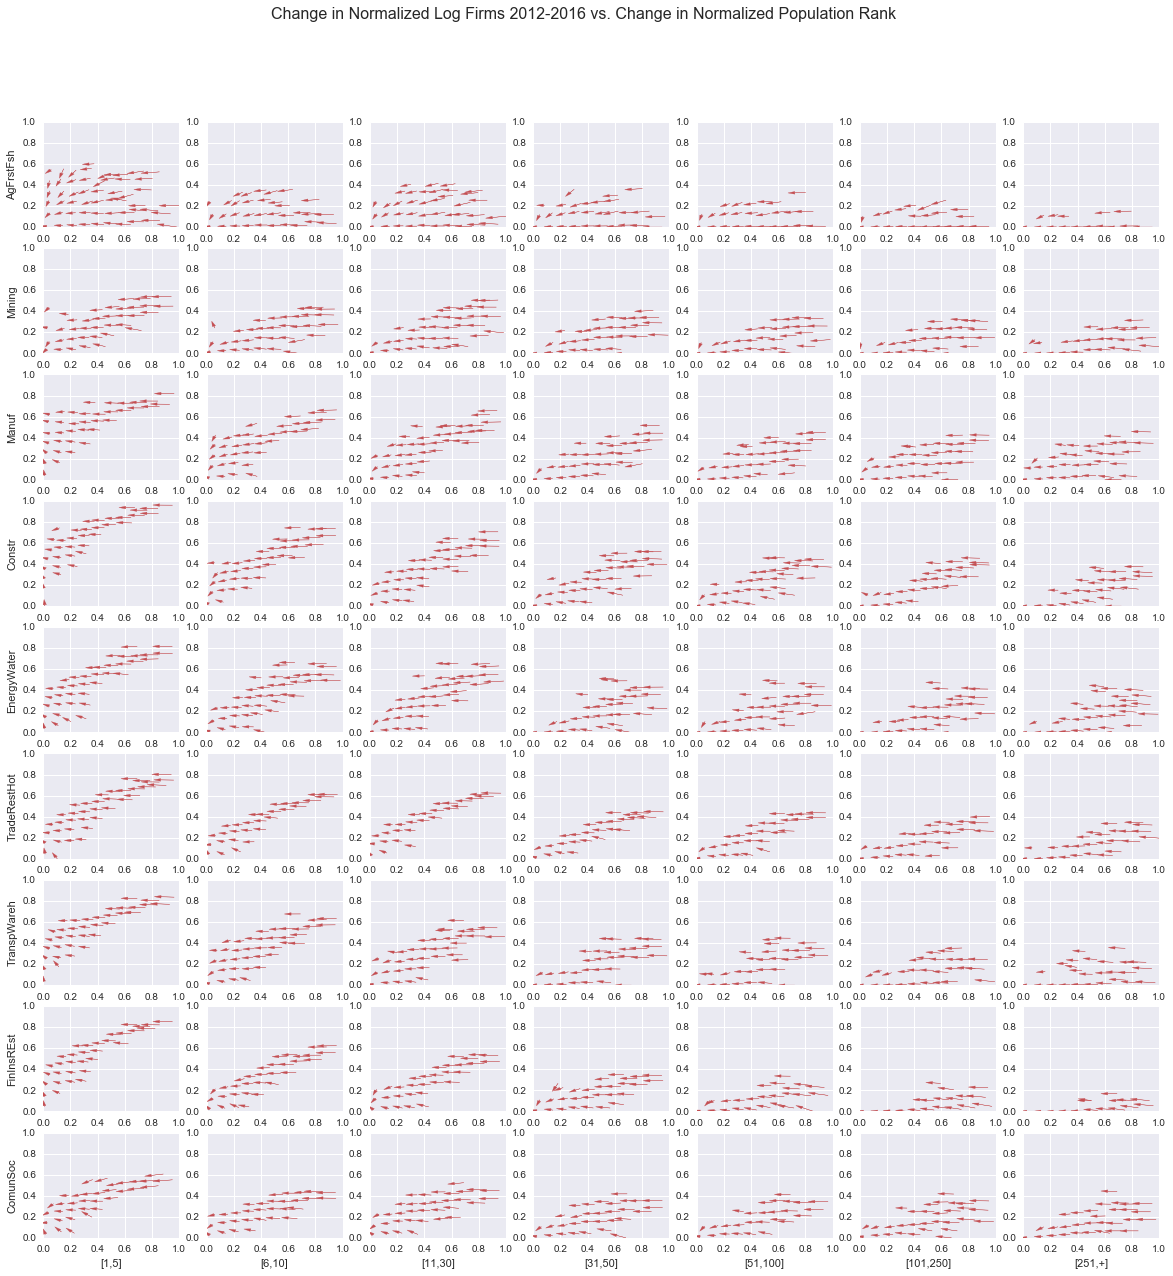

In [104]:
fig, axes = plt.subplots(9,7,figsize=(20,20))
arrowscale=0.5

fig.suptitle("Change in Normalized Log Firms 2012-2016 vs. Change in Normalized Population Rank", fontsize=16)

for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        dd=cc[(cc.Sector==sss)&(cc.EmpLevel==eee)]
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')
        ax=axes[ss,ee]
        for lf in range(10) :
            for pc in range(10) :
                aaa=dd[(dd.lf12==lf)&(dd.pc==pc)]
                if len(aaa)>0 :
                    ax.arrow(aaa.iloc[0][0], aaa.iloc[0][1], arrowscale*aaa.iloc[0][2], arrowscale*aaa.iloc[0][3], head_width=0.025, head_length=0.05, fc='r', ec='r')


axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()


In [174]:
#PARA POBLACION    
hm=h
hm['logfirms12']=hm.firmas12.apply(lambda x: np.log(1+x))/10.7
hm['logfirms16']=hm.firmas16.apply(lambda x: np.log(1+x))/10.7
hm['lf12']=hm.logfirms12.apply(lambda x: 9.999*x//1)
hm['pc']=hm.ptot10cum.apply(lambda x: 9.999*x//1)
hm['dptot']=(hm['ptot15']-hm['ptot10'])/5
hm['dlogfirms']=(hm['logfirms16']-hm['logfirms12'])/4
#hm['row']=hm.Sector.apply(lambda x: (x-1)//3 + 1)
#hm['col']=hm.Sector.apply(lambda x: x-3*((x-1)//3))

bb=hm[['entmun','Sector','EmpLevel','ptot10','ptot15','logfirms12','logfirms16','lf12','pc']].groupby(['Sector','EmpLevel','lf12','pc']).mean()
bb=bb.reset_index()
bb['ptot10']=bb['ptot10']/1.83e+06
bb['ptot15']=bb['ptot15']/1.83e+06
cc=bb[['ptot10','ptot15','logfirms12','logfirms16','Sector','EmpLevel','lf12','pc']]
cc['dptot']=(bb['ptot15']-bb['ptot10'])/5
cc['dlogfirms']=(bb['logfirms16']-bb['logfirms12'])/4
cc=cc[['ptot10','logfirms12','dptot','dlogfirms','Sector','EmpLevel','lf12','pc']]
cc.describe()


,ptot10,logfirms12,dptot,dlogfirms,Sector,EmpLevel,lf12,pc
count,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000
mean,0.214257,0.257662,0.002100,0.000563,4.909873,3.731139,2.202025,4.464304
std,0.235491,0.192127,0.002580,0.011043,2.554369,1.986815,1.863692,2.701573
min,0.000820,0.000000,-0.007727,-0.084122,1.000000,1.000000,0.000000,0.000000
25%,0.030010,0.117744,0.000328,-0.003227,3.000000,2.000000,1.000000,2.000000
50%,0.126574,0.239827,0.001488,0.001199,5.000000,4.000000,2.000000,5.000000
75%,0.335767,0.367714,0.003497,0.005379,7.000000,5.000000,3.000000,7.000000
max,0.992233,0.949957,0.015535,0.073259,9.000000,7.000000,9.000000,9.000000


In [188]:
pal


[(1.0, 0.9607843137254902, 0.9411764705882353),
 (0.996078431372549, 0.8784313725490196, 0.8235294117647058),
 (0.9882352941176471, 0.7333333333333333, 0.6313725490196078),
 (0.9882352941176471, 0.5725490196078431, 0.4470588235294118),
 (0.984313725490196, 0.41568627450980394, 0.2901960784313726),
 (0.9372549019607843, 0.23137254901960785, 0.17254901960784313),
 (0.796078431372549, 0.09411764705882353, 0.11372549019607843),
 (0.6470588235294118, 0.058823529411764705, 0.08235294117647059),
 (0.403921568627451, 0.0, 0.050980392156862744)]

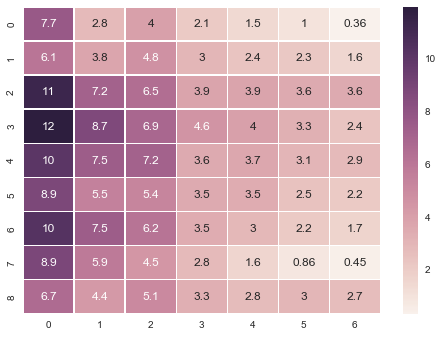

In [190]:
nn=cc[['Sector','EmpLevel','logfirms12']].groupby(['Sector','EmpLevel']).sum()
nn=nn.reset_index()
nn['Sector']=nn['Sector'].astype('int')
nn['EmpLevel']=nn['EmpLevel'].astype('int')
nn=nn.pivot('Sector','EmpLevel','logfirms12')  
nn=nn.as_matrix()
nn=0+11.99*nn/(np.max(nn))

pal=[(0.988235294117647,0.572549019607843,0.447058823529411),(0.986274509803922,0.494117647058823,0.368627450980392),(0.984313725490196,0.415686274509803,0.290196078431372),(0.96078431372549,0.323529411764705,0.231372549019608),(0.937254901960784,0.231372549019607,0.172549019607843),(0.866666666666666,0.162745098039215,0.14313725490196),(0.796078431372549,0.0941176470588235,0.113725490196078),(0.72156862745098,0.0764705882352941,0.0980392156862742),(0.647058823529411,0.0588235294117647,0.0823529411764705),(0.525490196078431,0.0294117647058823,0.0666666666666666),(0.403921568627451,0,0.0509803921568627),(0.201960784313725,0,0.0254901960784314)]
ax=sns.heatmap(nn, annot=True, linewidths=.5)


In [193]:
#from palettable.colorbrewer.qualitative import Accent_7
#pal=Accent_7.mpl_colors
#pal

#CAMBIE EL COLOR INTERMEDIO ABAJO

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]

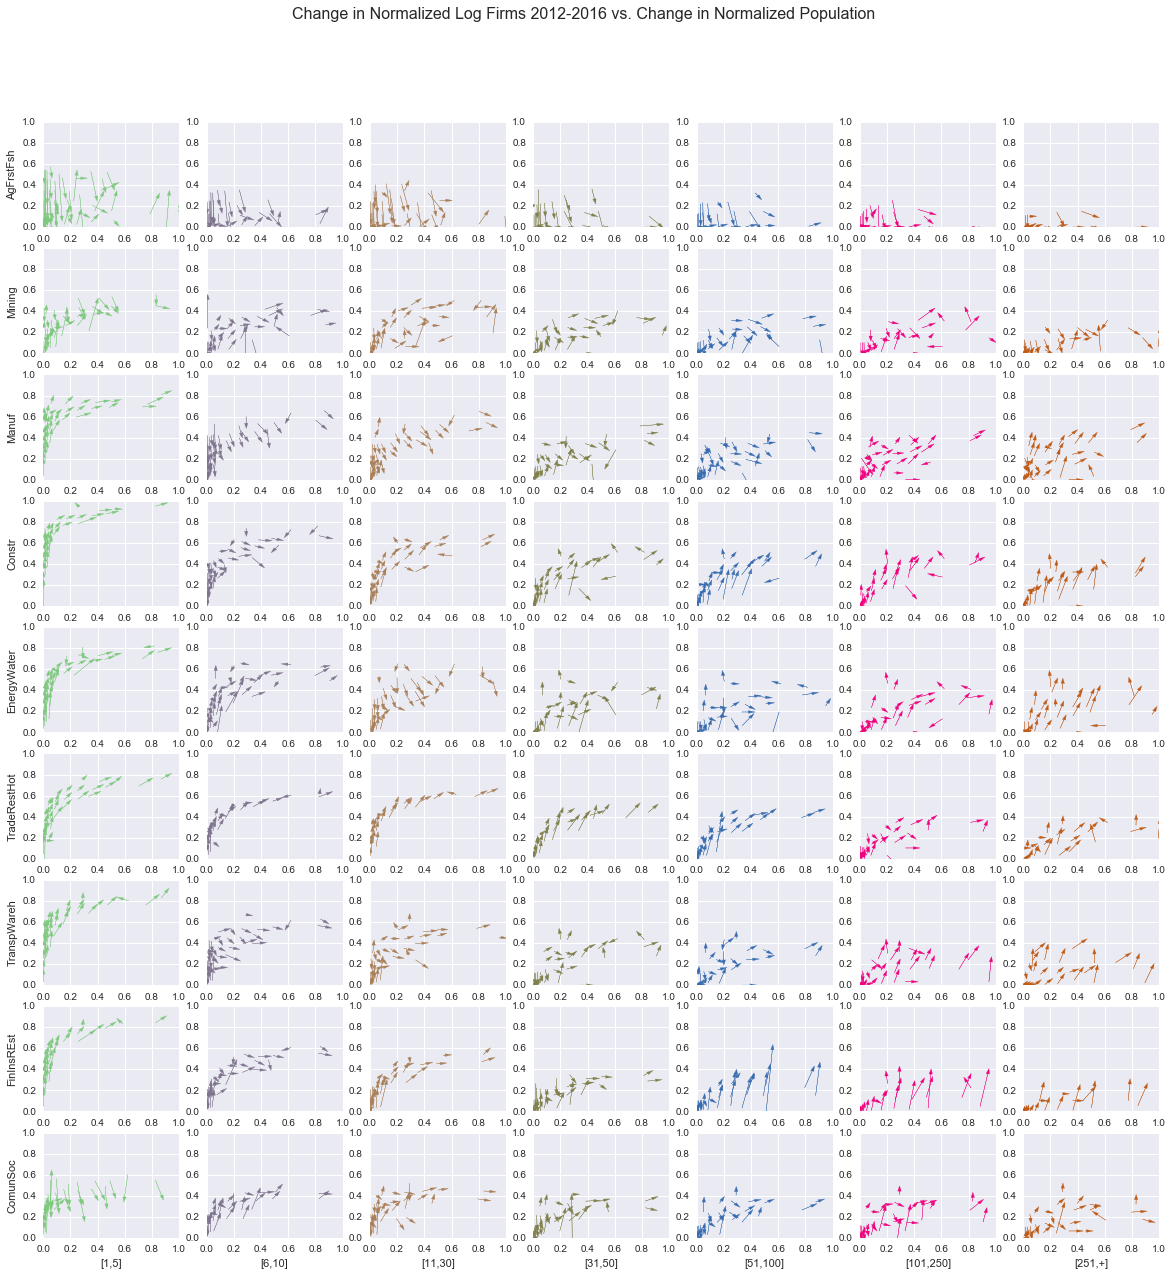

In [204]:
fig, axes = plt.subplots(9,7,figsize=(20,20))
arrowscale=8

#pal=[(0.988235294117647,0.572549019607843,0.447058823529411),(0.986274509803922,0.494117647058823,0.368627450980392),(0.984313725490196,0.415686274509803,0.290196078431372),(0.96078431372549,0.323529411764705,0.231372549019608),(0.937254901960784,0.231372549019607,0.172549019607843),(0.866666666666666,0.162745098039215,0.14313725490196),(0.796078431372549,0.0941176470588235,0.113725490196078),(0.72156862745098,0.0764705882352941,0.0980392156862742),(0.647058823529411,0.0588235294117647,0.0823529411764705),(0.525490196078431,0.0294117647058823,0.0666666666666666),(0.403921568627451,0,0.0509803921568627),(0.201960784313725,0,0.0254901960784314)]
#pal=[(0.4980392156862745, 0.788235294117647, 0.4980392156862745), (0.7450980392156863, 0.6823529411764706, 0.8313725490196079), (0.9921568627450981, 0.7529411764705882, 0.5254901960784314), (0.5, 0.5, 0.3), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]  
#El anterior lo obscureci a 
pal=[(0.4980392156862745, 0.788235294117647, 0.4980392156862745), (0.496732026143791,0.454901960784313,0.554248366013071), (0.661437908496732,0.501960784313725,0.350326797385621), (0.5, 0.5, 0.3), (0.2196078431372549, 0.4235294117647059, 0.6901960784313725), (0.9411764705882353, 0.00784313725490196, 0.4980392156862745), (0.7490196078431373, 0.3568627450980392, 0.09019607843137255)]  


fig.suptitle("Change in Normalized Log Firms 2012-2016 vs. Change in Normalized Population", fontsize=16)

for ss in range(9) :
    sss=ss+1
    for ee in range(7) :
        eee=ee+1
        dd=cc[(cc.Sector==sss)&(cc.EmpLevel==eee)]
        axes[ss,ee].set_xlabel('')
        axes[ss,ee].set_ylabel('')
        ax=axes[ss,ee]
        for lf in range(10) :
            for pc in range(10) :
                aaa=dd[(dd.lf12==lf)&(dd.pc==pc)]
                if len(aaa)>0 : 
                    tono = ee
#                    tono=np.floor(nn[ss,ee]).astype(np.int64)
                    ax.arrow(aaa.iloc[0][0], aaa.iloc[0][1], arrowscale*aaa.iloc[0][2], arrowscale*aaa.iloc[0][3], head_width=0.025, head_length=0.05, fc=pal[tono], ec=pal[tono])  

axes[0,0].set_ylabel('AgFrstFsh')
axes[1,0].set_ylabel('Mining')
axes[2,0].set_ylabel('Manuf')
axes[3,0].set_ylabel('Constr')
axes[4,0].set_ylabel('EnergyWater')
axes[5,0].set_ylabel('TradeRestHot')
axes[6,0].set_ylabel('TranspWareh')
axes[7,0].set_ylabel('FinInsREst')
axes[8,0].set_ylabel('ComunSoc')
axes[8,0].set_xlabel('[1,5]')
axes[8,1].set_xlabel('[6,10]')
axes[8,2].set_xlabel('[11,30]')
axes[8,3].set_xlabel('[31,50]')
axes[8,4].set_xlabel('[51,100]')
axes[8,5].set_xlabel('[101,250]')
axes[8,6].set_xlabel('[251,+]')
        
plt.show()


In [76]:
hm=h
hm['dptot']=(hm.ptot15/hm.ptot10-1)/5
hm=hm[hm.dptot<0.2]
sns.regplot(x=hm.ptot10cum, y=hm.dptot,lowess=True)

,entmun,Sector,EmpLevel,firmas12,firmas16,ptot10,im10,ptot15,im15,ptot10cum,nacent10,nacotrent10,pob5ymas10,vivotrent10,viveu10,dptot
0,1001.0,1.0,1.0,5.0,17,797010.0,-1.768,877190.0,-1.676,90924681.0,75.3,23.5,94.1,4.6,0.9,0.02012
1,1001.0,1.0,2.0,4.0,0,797010.0,-1.768,877190.0,-1.676,90924681.0,75.3,23.5,94.1,4.6,0.9,0.02012
2,1001.0,1.0,3.0,1.0,0,797010.0,-1.768,877190.0,-1.676,90924681.0,75.3,23.5,94.1,4.6,0.9,0.02012
3,1001.0,1.0,4.0,1.0,0,797010.0,-1.768,877190.0,-1.676,90924681.0,75.3,23.5,94.1,4.6,0.9,0.02012
4,1001.0,1.0,5.0,0.0,0,797010.0,-1.768,877190.0,-1.676,90924681.0,75.3,23.5,94.1,4.6,0.9,0.02012


C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


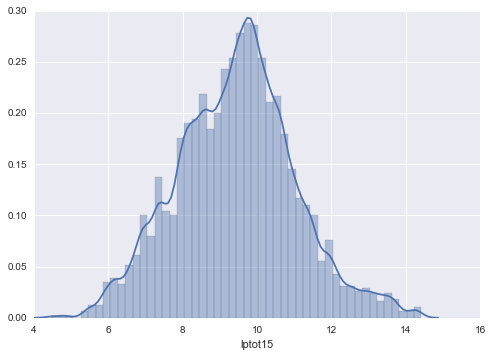

In [33]:
hm=h
hm['lptot15']=hm.ptot15.apply(lambda x: np.log(x))
#hm=hm[hm.ptot15>20000]
ax=sns.distplot(hm.lptot15)
#ax.set_yscale='log'
plt.show()